In [356]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [357]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [358]:
len(words)

32033

In [359]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [360]:
#build the dataset
block_size = 3 # context length: how many charactesrs do we take to predict the next one?
X, Y = [], []
for w in words:
    
#     print(w)
    context = [0] * block_size
#     print('context', context)
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
#         print(''.join(itos[i] for i in context),'--->', itos[ix])
        context =  context[1:] + [ix] #crop and append
    
X = torch.tensor(X)
Y = torch.tensor(Y)


In [443]:
# build the dataset

def build_dataset(words):  
  block_size = 3 # context length: how many characters do we take to predict the next one?
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])                              
Xte, Yte = build_dataset(words[n2:])

torch.Size([182441, 3]) torch.Size([182441])
torch.Size([22902, 3]) torch.Size([22902])
torch.Size([22803, 3]) torch.Size([22803])


In [361]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [362]:
C = torch.randn((27,2))

In [363]:
F.one_hot(torch.tensor(5), num_classes=27 ).dtype

torch.int64

In [364]:
C[5]

tensor([2.6606, 1.2567])

In [365]:
print('C.shape',C.shape)
print('X.shape',X.shape)

C.shape torch.Size([27, 2])
X.shape torch.Size([228146, 3])


In [366]:
F.one_hot(torch.tensor(5), num_classes=27 ).float() @ C

tensor([2.6606, 1.2567])

In [367]:
emb = C[X]
print(X.shape)
emb.shape
# emb[:,0,:]

torch.Size([228146, 3])


torch.Size([228146, 3, 2])

In [368]:
W1 = torch.randn((6,100))
b1 = torch.rand(100)

In [627]:
emb.shape

torch.Size([22902, 3, 14])

In [628]:
W1.shape

torch.Size([42, 200])

In [629]:
emb.view(-1,42) @ W1 + b1

tensor([[ -1.4823,  -4.9243,   2.0933,  ...,   5.2530,  -2.1745,  -2.9306],
        [ -3.8531,  -3.4044,   4.2346,  ...,   7.0587,  -3.0417,   0.3528],
        [ -9.7512,  -3.1640,   4.8618,  ...,  10.2266,  -5.9109,  -7.0721],
        ...,
        [  0.6473,   3.1528,  -0.0230,  ...,   3.5727,   6.0020,  -0.2631],
        [ -2.3846,  -8.3630,  -1.0397,  ...,  -5.6700,  -8.4582,  15.0831],
        [-13.9896,   5.0666,  15.5725,  ...,  11.6096,  -2.2613,  -4.8012]],
       grad_fn=<AddBackward0>)

In [370]:
emb[:,0,:].shape

torch.Size([228146, 2])

In [371]:
torch.cat([emb[:,0,:], emb[:,1,:], emb[:,2,:]],1).shape

torch.Size([228146, 6])

In [372]:
emb.shape

torch.Size([228146, 3, 2])

In [373]:
len(torch.unbind(emb,2))

2

In [374]:
torch.cat(torch.unbind(emb,1),1).shape

torch.Size([228146, 6])

In [375]:
a = torch.arange(18)
a 

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [376]:
a.shape

torch.Size([18])

In [377]:
a.view(3,3,2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [378]:
a.storage()

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage._TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [379]:
emb.shape

torch.Size([228146, 3, 2])

In [381]:
z = (emb.view(-1,6) @ W1 + b1) # setting that size to -1 python will  
                           #infer what size it should be if the second size is 6 
                           ##or u can use emb.shape[0]

In [382]:
h = torch.tanh(z)
h

tensor([[-0.4495,  0.6536, -0.9379,  ..., -0.1395,  0.6421,  0.4927],
        [-0.8419,  0.4769,  1.0000,  ..., -0.9452,  0.9992,  0.8548],
        [ 0.9474,  0.9981, -0.9764,  ...,  0.2317, -0.9348,  1.0000],
        ...,
        [-0.6748,  0.4912,  1.0000,  ..., -0.8959,  0.9988,  0.9835],
        [ 0.9441,  0.9941,  0.7371,  ..., -0.4419, -0.4676,  0.9999],
        [-0.8618,  0.9959,  1.0000,  ..., -0.9284,  0.9994,  0.9466]])

In [383]:
h.shape

torch.Size([228146, 100])

In [384]:
W2 = torch.randn((100, 27))
b2 = torch.rand(27)

In [385]:
logits = h @ W2 + b2

In [386]:
logits.shape

torch.Size([228146, 27])

In [387]:
counts = logits.exp()

In [388]:
prob = counts / counts.sum(1, keepdims=True)

In [389]:
prob.shape

torch.Size([228146, 27])

In [631]:
loss = -prob[torch.arange(32),Y[:32]].log().mean()
loss

tensor(16.8606)

In [577]:
logits = torch.tensor([-5, -3, 0, 100]) -100
counts = logits.exp()
probs = counts / counts.sum()
probs

tensor([0.0000e+00, 1.4013e-45, 3.7835e-44, 1.0000e+00])

In [597]:

# ------------ final code for this lecture --------------- 


In [598]:
Xtr.shape, Ytr.shape #dataset

(torch.Size([182441, 3]), torch.Size([182441]))

In [616]:
emb_dim = 14
nr_of_input_units = 3
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,emb_dim), generator=g)
W1 = torch.randn((emb_dim * nr_of_input_units,200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [617]:
sum(p.nelement() for p in parameters) #number of parameters in total

14405

In [618]:
for p in parameters:
    p.requires_grad = True

In [619]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
# lrs

In [620]:
lri = []
lossi = []
stepi = []
minibatch_size = 64

In [621]:

for i in range(200000):

    #minibatch construct
    ix = torch.randint(0, Xtr.shape[0],(minibatch_size,))
    
    emb = C[Xtr[ix]] # (minibatch_size, 3, 2)
    h = torch.tanh(emb.view(-1, emb_dim * nr_of_input_units) @ W1 +b1) #(minibatch_size,100)
    logits = h @ W2 + b2 #(minibatch_size,27)
    loss = F.cross_entropy(logits, Ytr[ix])
#     print('loss',loss.item())

    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    lr = 0.1 if i < 100000  else 0.01
    for p in parameters:
        p.data += -lr * p.grad

    #track stats
#      lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())
print('loss',loss.item())


loss 2.1720898151397705


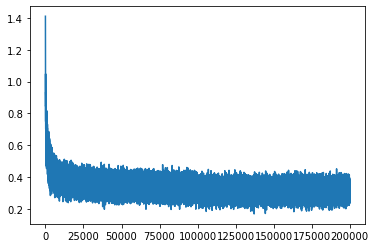

In [623]:
plt.plot(stepi, lossi)

In [624]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, emb_dim * nr_of_input_units) @ W1 +b1) #(32,100)
logits = h @ W2 + b2 #(32,27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.0876, grad_fn=<NllLossBackward0>)

In [625]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, emb_dim * nr_of_input_units) @ W1 +b1) #(32,100)
logits = h @ W2 + b2 #(32,27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1499, grad_fn=<NllLossBackward0>)

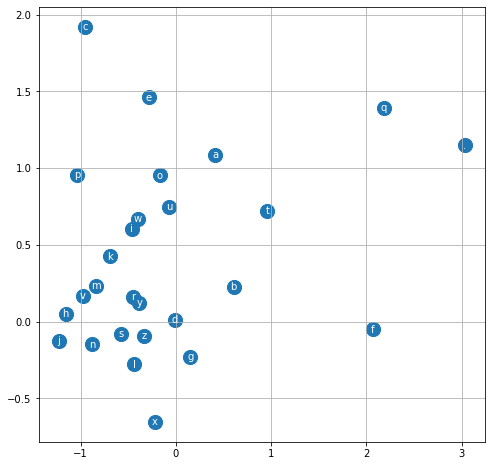

In [567]:
# see where letters are representedmbal7

plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color="white")
plt.grid('minor')    

In [434]:
#training split, dev/validation split, test split
#80% , 10%, 10%

In [491]:
C[:,0]

tensor([ 0.5331,  0.0460,  0.3142,  0.3152,  0.0280, -0.2658,  0.1479,  0.2731,
        -0.1699, -0.6458, -0.2964,  0.0884, -0.5622, -0.1462, -0.6722, -0.1891,
         0.2854, -1.5422, -0.5367,  0.1502,  0.1361,  0.6809, -0.0808, -0.3660,
        -0.0192, -1.0901, -0.0552], grad_fn=<SelectBackward0>)

In [492]:
C[:,1]

tensor([-0.1115, -0.4270,  0.8626,  0.3828,  0.4952, -0.4076,  0.7286,  1.3611,
         0.2559, -0.3428,  0.4363,  0.4057,  0.9122,  0.5782,  0.1825, -0.7032,
         0.5027,  0.0110,  0.4572,  0.1788,  0.3240,  1.9762,  0.8764,  0.3555,
         0.2228, -0.4040,  0.3632], grad_fn=<SelectBackward0>)

In [634]:
emb.view(1,-1).shape

torch.Size([1, 961884])

In [645]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      print('C',C)
      print('context',context)
      print('emb',emb)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      print(f'p: {probs.shape}')
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))


C tensor([[ 9.5648e-01, -4.0186e-01, -2.5336e-01, -1.4113e+00, -9.6660e-02,
          1.3578e-01, -8.9616e-01,  7.0991e-01,  7.1103e-01,  7.1463e-01,
         -6.3965e-01,  5.9502e-01,  1.8887e-01, -5.5026e-02],
        [ 1.3887e+00,  2.4286e+00,  9.5078e-01, -1.2331e+00,  1.3033e+00,
         -9.9044e-01,  8.9556e-01, -2.4540e-02, -1.3275e+00,  4.3002e-01,
         -1.9314e-01,  1.7046e+00,  1.9316e+00,  1.5380e-02],
        [-1.6475e-01,  1.5890e-01, -6.9046e-01,  2.8060e-01, -4.7939e-01,
          4.4240e-01, -8.0430e-01, -4.1649e-01, -9.3062e-01,  4.2578e-01,
         -2.5818e-01,  6.9162e-01,  1.9296e-02, -1.3338e-01],
        [-1.1852e-01,  2.5174e-01, -4.6261e-01,  3.7754e-01,  6.5745e-02,
          7.4379e-02, -1.0441e-01, -3.5171e-01, -2.6796e-01,  3.6691e-01,
          2.9799e-01,  8.5272e-03,  2.4430e-01, -4.1159e-01],
        [ 1.1185e-01,  3.5670e-01, -5.1504e-01, -1.7751e-02, -2.0279e-01,
          5.7643e-01, -6.4457e-01, -3.4094e-01, -6.9363e-01,  1.5678e-01,
         -

C tensor([[ 9.5648e-01, -4.0186e-01, -2.5336e-01, -1.4113e+00, -9.6660e-02,
          1.3578e-01, -8.9616e-01,  7.0991e-01,  7.1103e-01,  7.1463e-01,
         -6.3965e-01,  5.9502e-01,  1.8887e-01, -5.5026e-02],
        [ 1.3887e+00,  2.4286e+00,  9.5078e-01, -1.2331e+00,  1.3033e+00,
         -9.9044e-01,  8.9556e-01, -2.4540e-02, -1.3275e+00,  4.3002e-01,
         -1.9314e-01,  1.7046e+00,  1.9316e+00,  1.5380e-02],
        [-1.6475e-01,  1.5890e-01, -6.9046e-01,  2.8060e-01, -4.7939e-01,
          4.4240e-01, -8.0430e-01, -4.1649e-01, -9.3062e-01,  4.2578e-01,
         -2.5818e-01,  6.9162e-01,  1.9296e-02, -1.3338e-01],
        [-1.1852e-01,  2.5174e-01, -4.6261e-01,  3.7754e-01,  6.5745e-02,
          7.4379e-02, -1.0441e-01, -3.5171e-01, -2.6796e-01,  3.6691e-01,
          2.9799e-01,  8.5272e-03,  2.4430e-01, -4.1159e-01],
        [ 1.1185e-01,  3.5670e-01, -5.1504e-01, -1.7751e-02, -2.0279e-01,
          5.7643e-01, -6.4457e-01, -3.4094e-01, -6.9363e-01,  1.5678e-01,
         -

C tensor([[ 9.5648e-01, -4.0186e-01, -2.5336e-01, -1.4113e+00, -9.6660e-02,
          1.3578e-01, -8.9616e-01,  7.0991e-01,  7.1103e-01,  7.1463e-01,
         -6.3965e-01,  5.9502e-01,  1.8887e-01, -5.5026e-02],
        [ 1.3887e+00,  2.4286e+00,  9.5078e-01, -1.2331e+00,  1.3033e+00,
         -9.9044e-01,  8.9556e-01, -2.4540e-02, -1.3275e+00,  4.3002e-01,
         -1.9314e-01,  1.7046e+00,  1.9316e+00,  1.5380e-02],
        [-1.6475e-01,  1.5890e-01, -6.9046e-01,  2.8060e-01, -4.7939e-01,
          4.4240e-01, -8.0430e-01, -4.1649e-01, -9.3062e-01,  4.2578e-01,
         -2.5818e-01,  6.9162e-01,  1.9296e-02, -1.3338e-01],
        [-1.1852e-01,  2.5174e-01, -4.6261e-01,  3.7754e-01,  6.5745e-02,
          7.4379e-02, -1.0441e-01, -3.5171e-01, -2.6796e-01,  3.6691e-01,
          2.9799e-01,  8.5272e-03,  2.4430e-01, -4.1159e-01],
        [ 1.1185e-01,  3.5670e-01, -5.1504e-01, -1.7751e-02, -2.0279e-01,
          5.7643e-01, -6.4457e-01, -3.4094e-01, -6.9363e-01,  1.5678e-01,
         -

C tensor([[ 9.5648e-01, -4.0186e-01, -2.5336e-01, -1.4113e+00, -9.6660e-02,
          1.3578e-01, -8.9616e-01,  7.0991e-01,  7.1103e-01,  7.1463e-01,
         -6.3965e-01,  5.9502e-01,  1.8887e-01, -5.5026e-02],
        [ 1.3887e+00,  2.4286e+00,  9.5078e-01, -1.2331e+00,  1.3033e+00,
         -9.9044e-01,  8.9556e-01, -2.4540e-02, -1.3275e+00,  4.3002e-01,
         -1.9314e-01,  1.7046e+00,  1.9316e+00,  1.5380e-02],
        [-1.6475e-01,  1.5890e-01, -6.9046e-01,  2.8060e-01, -4.7939e-01,
          4.4240e-01, -8.0430e-01, -4.1649e-01, -9.3062e-01,  4.2578e-01,
         -2.5818e-01,  6.9162e-01,  1.9296e-02, -1.3338e-01],
        [-1.1852e-01,  2.5174e-01, -4.6261e-01,  3.7754e-01,  6.5745e-02,
          7.4379e-02, -1.0441e-01, -3.5171e-01, -2.6796e-01,  3.6691e-01,
          2.9799e-01,  8.5272e-03,  2.4430e-01, -4.1159e-01],
        [ 1.1185e-01,  3.5670e-01, -5.1504e-01, -1.7751e-02, -2.0279e-01,
          5.7643e-01, -6.4457e-01, -3.4094e-01, -6.9363e-01,  1.5678e-01,
         -

emb tensor([[[ 0.9565, -0.4019, -0.2534, -1.4113, -0.0967,  0.1358, -0.8962,
           0.7099,  0.7110,  0.7146, -0.6396,  0.5950,  0.1889, -0.0550],
         [ 0.9565, -0.4019, -0.2534, -1.4113, -0.0967,  0.1358, -0.8962,
           0.7099,  0.7110,  0.7146, -0.6396,  0.5950,  0.1889, -0.0550],
         [ 0.9565, -0.4019, -0.2534, -1.4113, -0.0967,  0.1358, -0.8962,
           0.7099,  0.7110,  0.7146, -0.6396,  0.5950,  0.1889, -0.0550]]],
       grad_fn=<IndexBackward0>)
p: torch.Size([1, 27])
C tensor([[ 9.5648e-01, -4.0186e-01, -2.5336e-01, -1.4113e+00, -9.6660e-02,
          1.3578e-01, -8.9616e-01,  7.0991e-01,  7.1103e-01,  7.1463e-01,
         -6.3965e-01,  5.9502e-01,  1.8887e-01, -5.5026e-02],
        [ 1.3887e+00,  2.4286e+00,  9.5078e-01, -1.2331e+00,  1.3033e+00,
         -9.9044e-01,  8.9556e-01, -2.4540e-02, -1.3275e+00,  4.3002e-01,
         -1.9314e-01,  1.7046e+00,  1.9316e+00,  1.5380e-02],
        [-1.6475e-01,  1.5890e-01, -6.9046e-01,  2.8060e-01, -4.7939e-01,
 

emb tensor([[[-0.4384,  0.0181, -0.1406, -0.1208, -0.1412, -0.0088, -0.4386,
           0.1552, -0.2173,  0.5267,  0.5644,  0.3139, -0.5775, -0.6072],
         [ 1.3887,  2.4286,  0.9508, -1.2331,  1.3033, -0.9904,  0.8956,
          -0.0245, -1.3275,  0.4300, -0.1931,  1.7046,  1.9316,  0.0154],
         [-0.0457,  0.3753, -0.7160,  0.0057,  0.1198,  0.5574, -0.5784,
          -0.5053, -0.6956,  0.4155, -0.1404,  0.1900, -0.0968, -0.0175]]],
       grad_fn=<IndexBackward0>)
p: torch.Size([1, 27])
C tensor([[ 9.5648e-01, -4.0186e-01, -2.5336e-01, -1.4113e+00, -9.6660e-02,
          1.3578e-01, -8.9616e-01,  7.0991e-01,  7.1103e-01,  7.1463e-01,
         -6.3965e-01,  5.9502e-01,  1.8887e-01, -5.5026e-02],
        [ 1.3887e+00,  2.4286e+00,  9.5078e-01, -1.2331e+00,  1.3033e+00,
         -9.9044e-01,  8.9556e-01, -2.4540e-02, -1.3275e+00,  4.3002e-01,
         -1.9314e-01,  1.7046e+00,  1.9316e+00,  1.5380e-02],
        [-1.6475e-01,  1.5890e-01, -6.9046e-01,  2.8060e-01, -4.7939e-01,
 

C tensor([[ 9.5648e-01, -4.0186e-01, -2.5336e-01, -1.4113e+00, -9.6660e-02,
          1.3578e-01, -8.9616e-01,  7.0991e-01,  7.1103e-01,  7.1463e-01,
         -6.3965e-01,  5.9502e-01,  1.8887e-01, -5.5026e-02],
        [ 1.3887e+00,  2.4286e+00,  9.5078e-01, -1.2331e+00,  1.3033e+00,
         -9.9044e-01,  8.9556e-01, -2.4540e-02, -1.3275e+00,  4.3002e-01,
         -1.9314e-01,  1.7046e+00,  1.9316e+00,  1.5380e-02],
        [-1.6475e-01,  1.5890e-01, -6.9046e-01,  2.8060e-01, -4.7939e-01,
          4.4240e-01, -8.0430e-01, -4.1649e-01, -9.3062e-01,  4.2578e-01,
         -2.5818e-01,  6.9162e-01,  1.9296e-02, -1.3338e-01],
        [-1.1852e-01,  2.5174e-01, -4.6261e-01,  3.7754e-01,  6.5745e-02,
          7.4379e-02, -1.0441e-01, -3.5171e-01, -2.6796e-01,  3.6691e-01,
          2.9799e-01,  8.5272e-03,  2.4430e-01, -4.1159e-01],
        [ 1.1185e-01,  3.5670e-01, -5.1504e-01, -1.7751e-02, -2.0279e-01,
          5.7643e-01, -6.4457e-01, -3.4094e-01, -6.9363e-01,  1.5678e-01,
         -